### **Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка**
### *Лабораторна робота № 4*
### *Любченко Мирослави*

 

1.   Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.






In [1]:
import pandas as pd #для обработки и анализа данных, работа с числовыми таблицами и временными рядами
import numpy as np #поддержка больших многомерных массивов и матриц
import scipy.stats as sts #Statistical functions 

In [66]:
new_df = pd.DataFrame({
    'Logistic_data': np.random.logistic(loc=3, scale=7, size=20),
    'Normal_data_01': np.random.normal(loc=10, scale=5, size=20),
    'Normal_data_02': np.random.standard_normal(size=20),
    'Sample_random_data': np.random.random_sample(size=20),
    'Normal_data_03': np.random.randn(20),
    'Uniform_data': np.random.uniform(size=20),
    
})

new_df

,Logistic_data,Normal_data_01,Normal_data_02,Sample_random_data,Normal_data_03,Uniform_data
0,4.822847,12.478827,-0.339840,0.408515,1.302453,0.070415
1,11.616607,8.348403,-0.835238,0.136976,-0.921482,0.842711
2,-4.274810,14.129238,-0.467599,0.883611,-0.066831,0.452241
3,18.830480,8.591721,0.961478,0.563006,1.075031,0.840162
4,13.561668,1.538631,0.263653,0.715009,-0.520720,0.399458
5,0.443724,3.957338,1.344384,0.621239,-0.440551,0.150920
6,2.008442,6.810481,-0.145423,0.681410,-0.114991,0.792114
7,-4.085868,11.853899,0.198205,0.253865,0.120686,0.411991
8,0.843146,15.770109,-0.395959,0.387447,0.335885,0.521662
9,6.457465,12.613235,0.409982,0.632442,0.403486,0.724168


2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
Детальний опис роботи критерію та приклад його розрахунку:
https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf



In [67]:
new_df = pd.DataFrame({key: sorted(values) for key, values in new_df.transpose().iterrows()})


In [68]:
def mean(array,n):
    alll=0
    for i in range(n):
        alll+=array[i]
    return alll/n
mean_value = {i: mean(new_df[i],20) for i in new_df} 

In [69]:
def s_sq(array,n, mean_):
    p=0
    for i in range(n):
        p+=((array[i]-mean_)**2)
    return p
s_sqq = {i: s_sq(new_df[i],20,mean_value[i]) for i in new_df}

In [70]:
a=[0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]

def b(array,n):
    m=0
    for i in range(n//2):
        m+=(a[i]*(array[(n-1)-i]-array[i]))
    return m
    

b_value = {i: b(new_df[i],20) for i in new_df}


In [72]:
def W(b_v, s_sqq_):
    return (b_v**2)/s_sqq_

W_value = {i: W(b_value[i], s_sqq[i]) for i in new_df}

WTheory = sts.shapiro(new_df['Normal_data_01'])
W_value, WTheory

({'Logistic_data': 0.8979336090836747,
  'Normal_data_01': 0.9444374210164574,
  'Normal_data_02': 0.969129724136022,
  'Sample_random_data': 0.9235708332456193,
  'Normal_data_03': 0.9472401554694582,
  'Uniform_data': 0.9175364012394295},
 (0.9444140791893005, 0.2901283800601959))

3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.
Шаблон таблиці:
https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing

In [73]:
column_names = ["Variable", "Statistics", "Distribution"]
df = pd.DataFrame(columns = column_names)
df

,Variable,Statistics,Distribution


4. Занести в стовпчик Variable назви змінних.

In [74]:
df["Variable"] = new_df.keys()
df

,Variable,Statistics,Distribution
0,Logistic_data,NaN,NaN
1,Normal_data_01,NaN,NaN
2,Normal_data_02,NaN,NaN
3,Sample_random_data,NaN,NaN
4,Normal_data_03,NaN,NaN
5,Uniform_data,NaN,NaN


5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [75]:
def norm(value,theory):
    if(value >= theory):
        l = 'normal'
    else:
        l = 'non-normal'
    return l


df["Distribution"] = [(norm(W_value[i],WTheory[0]))for i in df["Variable"]]

df


,Variable,Statistics,Distribution
0,Logistic_data,NaN,non-normal
1,Normal_data_01,NaN,normal
2,Normal_data_02,NaN,normal
3,Sample_random_data,NaN,non-normal
4,Normal_data_03,NaN,normal
5,Uniform_data,NaN,non-normal


6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].



In [81]:
for i in range (df.shape[0]):
    var = df["Distribution"][i]
    if 'normal' in var:
        df["Statistics"][i] = f'{new_df[var].mean()} [{new_df[var].std()}]'

df

,Variable,Statistics,Distribution
0,Logistic_data,NaN,non-normal
1,Normal_data_01,9.460379241501872 [4.281571374598374],normal
2,Normal_data_02,0.07764596609703689 [0.7631817331205915],normal
3,Sample_random_data,NaN,non-normal
4,Normal_data_03,0.16355588125988768 [0.8668160505878321],normal
5,Uniform_data,NaN,non-normal


7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [85]:
for i in range (df.shape[0]):
    var = df["Distribution"][i]
    if 'normal' not in var:
        df["Statistics"][i] = \
        f'{new_df[var].median()} \
        [{new_df[var].quantile(0.25)}; {new_df[var].quantile(0.75)}]'

df

,Variable,Statistics,Distribution
0,Logistic_data,1.7109944391517427 [-1.503638418515926...,non-normal
1,Normal_data_01,9.460379241501872 [4.281571374598374],normal
2,Normal_data_02,0.07764596609703689 [0.7631817331205915],normal
3,Sample_random_data,0.6268404484791263 [0.3735234456485111...,non-normal
4,Normal_data_03,0.16355588125988768 [0.8668160505878321],normal
5,Uniform_data,0.4226348414745536 [0.263277920038564;...,non-normal


8. Зберегти таблицю в пдф форматі

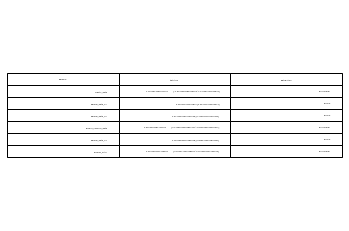

In [86]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
fig = plt.figure()
ax=fig.add_subplot(111)

cell_text = []
for row in range(len(df)):
    cell_text.append(df.iloc[row])

ax.table(cellText=cell_text, colLabels=df.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
pdf.savefig(fig)
pdf.close()